<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Image%20DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Fréquences dans une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

fatal: destination path 'INF8770' already exists and is not an empty directory.
/content/INF8770


In [2]:
import numpy as np
import scipy.fftpack as dctpack
from skimage import io
import matplotlib.pyplot as plt
from skimage import data

Lecture de l'image et conversion en tons de gris. On pourrait faire les calculs pour chaque canal de couleur séparé.

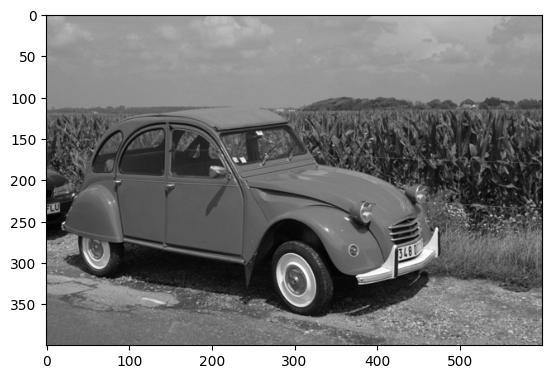

In [3]:
img = io.imread('RGB.jpg', as_gray=True)*255
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.show()

Calcul de la DCT sur des blocs 8 par 8. Puisque la DCT est séparable, on l'applique en X et ensuite en Y.

On fera la transformée inverse pour quelques cosinus pris de façon isolée. C'est-à-dire que tout les cosinus seront mis à zéro, sauf un sélectionné. On affichera ensuite les images associées.

In [4]:
imageDC = np.zeros((len(img),len(img[0])))
imageAC1 = np.zeros((len(img),len(img[0])))
imageAC2 = np.zeros((len(img),len(img[0])))
imageAC3 = np.zeros((len(img),len(img[0])))
imageHFreq = np.zeros((len(img),len(img[0])))
for i in range(0,len(img),8):
    for j in range(0,len(img[0]),8):
        tmp = img[i:i+8,j:j+8]
        tmp = tmp - 128
        resdct = dctpack.dct(dctpack.dct(tmp, axis=0, norm='ortho'), axis=1, norm='ortho')
        # On extrait le coefficent DC et on l'ajoute dans une matrice image.
        bloccoeff = np.zeros((8,8))
        bloccoeff[0,0] = resdct[0,0];
        BlocImageaveccoeff = dctpack.idct(dctpack.idct(bloccoeff, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
        imageDC[i:i+8,j:j+8] = BlocImageaveccoeff

        bloccoeff = np.zeros((8,8))
        bloccoeff[0,1] = resdct[1,1];
        BlocImageaveccoeff = dctpack.idct(dctpack.idct(bloccoeff, axis=0, norm='ortho'), axis=1, norm='ortho')
        imageAC1[i:i+8,j:j+8] = BlocImageaveccoeff

        bloccoeff = np.zeros((8,8))
        bloccoeff[1,0] = resdct[1,0];
        BlocImageaveccoeff = dctpack.idct(dctpack.idct(bloccoeff, axis=0, norm='ortho'), axis=1, norm='ortho')
        imageAC2[i:i+8,j:j+8] = BlocImageaveccoeff

        bloccoeff = np.zeros((8,8))
        bloccoeff[1,1] = resdct[1,1];
        BlocImageaveccoeff = dctpack.idct(dctpack.idct(bloccoeff, axis=0, norm='ortho'), axis=1, norm='ortho')
        imageAC3[i:i+8,j:j+8] = BlocImageaveccoeff

        bloccoeff = np.zeros((8,8))
        bloccoeff[7,7] = resdct[7,7];
        BlocImageaveccoeff = dctpack.idct(dctpack.idct(bloccoeff, axis=0, norm='ortho'), axis=1, norm='ortho')
        imageHFreq[i:i+8,j:j+8] = BlocImageaveccoeff

Affichage de l'image DC et en combinaison avec des images avec des plus hautes fréquences

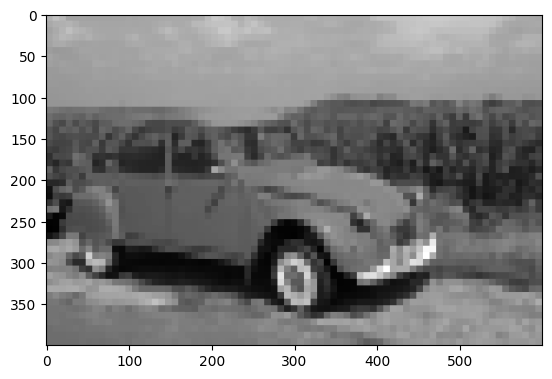

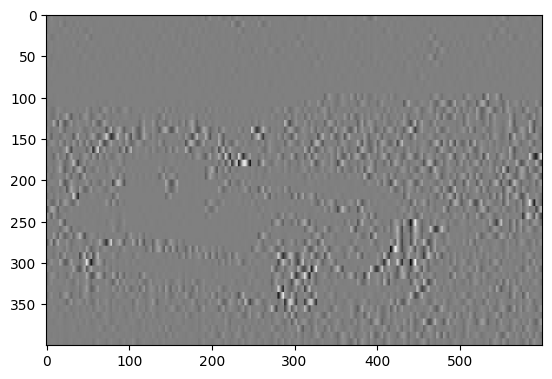

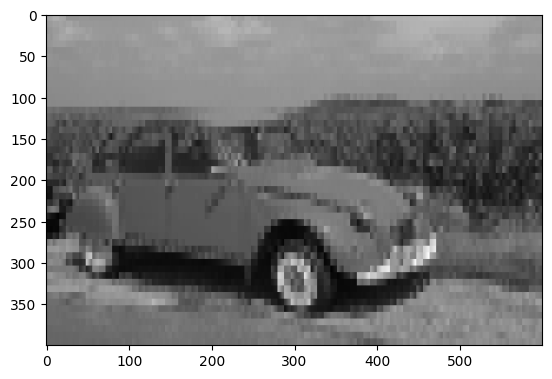

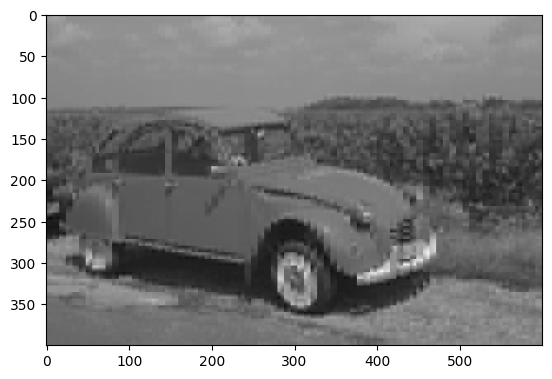

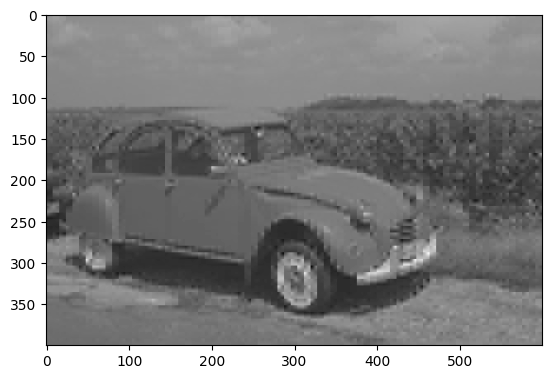

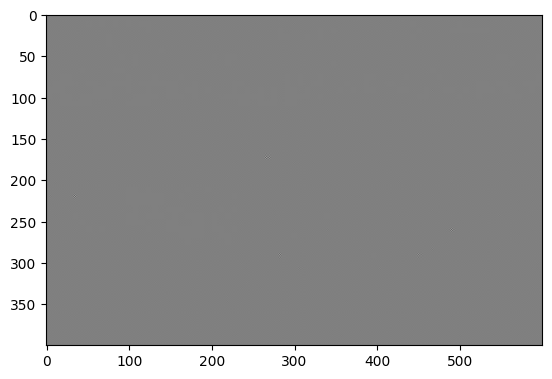

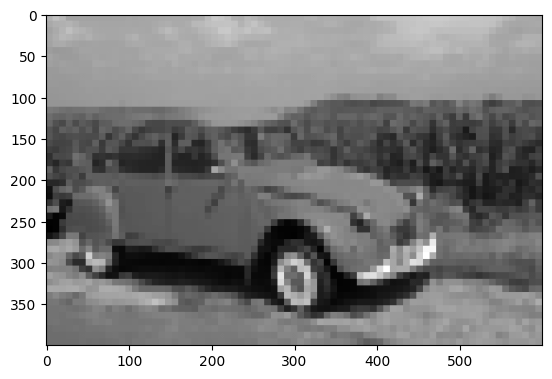

In [5]:
plt.imshow(imageDC,cmap = plt.get_cmap('gray')) #Image DC, cosinus de fréquence zéro
plt.show()
plt.imshow(imageAC1,cmap = plt.get_cmap('gray')) #cosinus de fréquece 0 en X et 1 en Y.
plt.show()
plt.imshow(imageDC+imageAC1,cmap = plt.get_cmap('gray')) #Combinaison de cosinus.
plt.show()
plt.imshow(imageDC+imageAC1+imageAC2,cmap = plt.get_cmap('gray')) #Combinaison de cosinus.
plt.show()
plt.imshow(imageDC+imageAC1+imageAC2+imageAC3,cmap = plt.get_cmap('gray')) #Combinaison de cosinus.
plt.show()
plt.imshow(imageHFreq,cmap = plt.get_cmap('gray')) #Cosinus de fréquence la plus élevée et X et Y.
plt.show()
plt.imshow(imageDC+imageHFreq,cmap = plt.get_cmap('gray')) #Sa contribution est très faible.
plt.show()

In [6]:
np.set_printoptions(precision=2,suppress=True)
print(imageHFreq) #Si on l'imprime.


[[ 0.01 -0.02  0.03 ... -0.01  0.01 -0.  ]
 [-0.02  0.05 -0.08 ...  0.03 -0.02  0.01]
 [ 0.03 -0.08  0.11 ... -0.04  0.03 -0.01]
 ...
 [ 0.01 -0.02  0.03 ... -0.02  0.01 -0.  ]
 [-0.01  0.02 -0.02 ...  0.01 -0.01  0.  ]
 [ 0.   -0.01  0.01 ... -0.    0.   -0.  ]]


Grass, image avec des hautes fréquences, clock, image avec moins de hautes fréquences

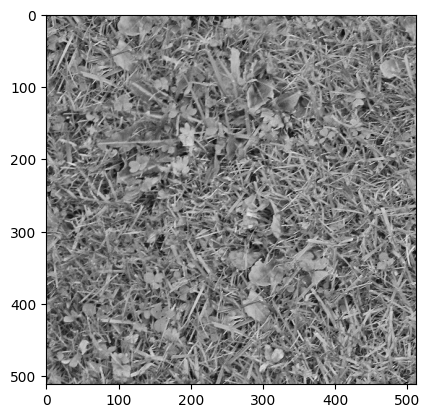

[[1341.25  237.06 -211.09  145.29 -151.25  -40.96  -10.52   61.71]
 [   0.79  273.7    -9.7   -81.38   25.     76.78   14.95  -90.13]
 [ -20.08   -6.3    70.04  -63.19  139.03   73.99   27.5  -129.72]
 [-126.92  207.69   48.57  -67.92  -76.78  -96.74   74.69   47.43]
 [-124.75 -131.13   41.79  -98.77   27.75    7.55  -83.34  -19.61]
 [  22.49  122.57  -16.03    3.78   21.53  170.63  -38.22  -31.82]
 [ -55.      0.55   77.5   -14.76   24.68  -45.71    7.46    4.83]
 [   3.52  -76.1    -4.73  -44.77 -122.53   68.12  -76.29   46.09]]


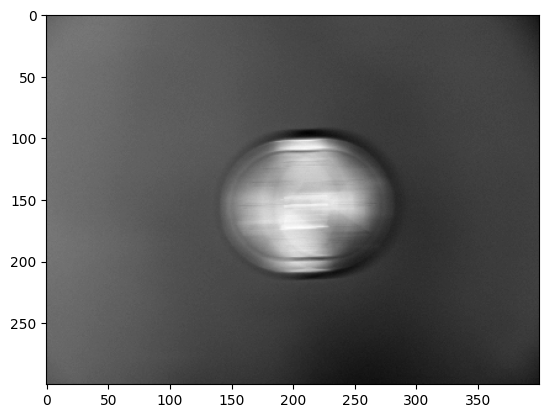

[[242.75  -8.13   0.04  -1.17   0.    -0.76  -0.56  -0.88]
 [ -7.93  -0.36   1.5   -0.91  -0.08   0.58   0.68  -0.82]
 [  1.08  -2.49  -1.18   0.09  -0.02   0.81  -0.03   0.14]
 [ -2.25   0.26   1.6   -0.56   0.63  -1.55  -2.67   0.42]
 [ -0.5    0.36   1.67   0.72  -0.25  -0.34   0.12   1.54]
 [ -0.36   0.23  -0.19   1.47   0.36  -0.25  -0.28  -0.45]
 [  0.64   0.37  -1.03   1.38  -1.35   0.77  -0.82  -0.05]
 [ -0.25  -0.3   -1.79   0.12   0.29   0.45  -0.11   1.67]]


In [7]:
img2 = data.grass() #grass vs clock
plt.imshow(img2,plt.get_cmap('gray'))
plt.show()
tmp = img2[0:8,0:8]
tmp = tmp - 128
resdct = dctpack.dct(dctpack.dct(tmp, axis=0, norm='ortho'), axis=1, norm='ortho')
print(resdct)


img2 = data.clock() #grass vs clock
plt.imshow(img2,plt.get_cmap('gray'))
plt.show()
tmp = img2[0:8,0:8]
tmp = tmp - 128
resdct = dctpack.dct(dctpack.dct(tmp, axis=0, norm='ortho'), axis=1, norm='ortho')
print(resdct)